In [28]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

## Split training set into training set and development set

In [31]:
# let's split into independent and dependent variables

X = df_train.drop("label", axis=1).values
y = df_train["label"].copy().values


# let's split the original training set into 80 training - 20 development
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.20)

print(f'X_train shape:{X_train.shape}')
print(f'X_dev shape:{X_dev.shape}')
print(f'y_train shape:{y_train.shape}')
print(f'y_dev shape:{y_dev.shape}')

X_train shape:(48000, 784)
X_dev shape:(12000, 784)
y_train shape:(48000,)
y_dev shape:(12000,)


In [ ]:
# let's create a Random Forrest model and fit it to the training data
#clf = RandomForestClassifier(n_estimators = 100, max_depth = 5, max_features = 100, bootstrap = True, random_state = 18)
#clf.fit(X_train, y_train)

#feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)

#print("Accuracy model:",clf.score(X_dev, y_dev))


Accuracy model: 0.8435833333333334


A model trained on 100 estimators, at depth 5, with 100 features gave an accuracy of .84
I have used Google Colab to tweak the model and find the best tuning. 

I find one single parameter limiting, I think that specifying depth is very important but then also being able to choose a large enough amount of estimators. 
From my experimenting I've discovered that the parameter that seems to influence the model the least is the max_features. Diminushing the n_estimators can quickly bring down the accuracy. I've also pushed the model to depth 12 and seems to be more accurate.

If I had to choose just one parameter, the most important one is surely the depth.

Here is the best version I could come up with:


## Creating and fitting the model

In [32]:
# the best Random Forrest model I could find 
clf = RandomForestClassifier(n_estimators = 100, max_depth = 12, max_features = 75, bootstrap = True, random_state = 18)
clf.fit(X_train, y_train)

print("Accuracy model:",clf.score(X_dev, y_dev))

Accuracy model: 0.9556666666666667


The accuracy has improved to more than 95%. 

## Validation

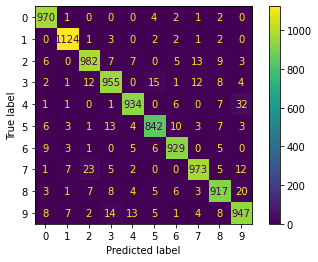

In [26]:
# import the appropriate function to calculate the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# split the validation set into X and y
X_test = df_test.drop("label", axis=1).values
y_test = df_test["label"].copy().values


# from predictions on validation set
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
print("Predictive accuracy model:",clf.score(X_test, y_test))

Predictive accuracy model: 0.9586


From the confusion matrix we can notice that the classes that the model struggles with thew most are (9 and 4), (2 and 7), (9 and 8). 

And it makes sense given that this is a set of handwritten numbers: most of the times we as humans would probably fail to tell the numbers apart, but we always look it in the context and go for the number that makes more sense. 

It's also very nice to see that the model has a slightly better accuracy in predicting values on a set it has never seen before. 

## Performance metrics

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# MODEL'S ACCURACY
model_accuracy = accuracy_score(y_test, y_pred)
print("Model's accuracy:", model_accuracy)

# MODEL'S PRECISION
model_precision = precision_score(y_test, y_pred, average='weighted')
print("Model's precision:", model_precision)

# MODEL'S RECALL
model_recall = recall_score(y_test, y_pred, average='weighted')
print("Model's recall:", model_recall)

# MODEL'S F1-SCORE
model_f1_score = f1_score(y_test, y_pred, average='weighted')
print("Model's fa-score:", model_f1_score)

Model's accuracy: 0.9573
Model's precision: 0.9572974603022915
Model's recall: 0.9573
Model's fa-score: 0.9572576270212708


All these measures of performance are really good. 